# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Khamdan Annas Fakhryza
- **Email:** Khamdan@std.unissul.ac.id
- **ID Dicoding:** khamdan-fakhryza

## Menentukan Pertanyaan Bisnis Atau Analisis

- 1. Apa dampak kecepatan angin (WSPM) terhadap distribusi konsentrasi PM2.5 selama muim panas (Juni hingga Agustus)?
- 2. Apa pengaruh kkonsentrasi NO2 dan CO yag berasal dari misi kedaraan bermotor terhadap kualitas udara?
- 3. Bagaimana hujan mempengaruhi tingkat polusi Udara akibat polutan tertentu?
- 4. Bagaimana kaitan antara konsentrasi NO2  dan CO  dalam P=rposes pembentukan O3 ?

## Import Semua Packages/Library yang Digunakan

In [53]:
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi data\import matplotlib.pyplot as plt  # Untuk visualisasi\import seaborn as sns  # Untuk plotting berbasis statistik
import warnings  # Untuk mengabaikan peringatan
import seaborn as sns
import matplotlib.pyplot as plt

### Gathering Data

In [54]:
import pandas as pd

locations = [
    "Aotizhongxin", "Changping", "Dingling", "Dongsi", "Guanyuan", "Gucheng", 
    "Huairou", "Nongzhanguan", "Shunyi", "Tiantan", "Wanliu", "Wanshouxigong"
]

dataframes = {}
for loc in locations:
    file_path = f"Air-quality-dataset/PRSA_Data_{loc}_20130301-20170228.csv"
    dataframes[loc] = pd.read_csv(file_path)

# Sekarang, setiap lokasi memiliki dataframe tersimpan dalam dictionary `dataframes`


In [56]:
df_Aotizhongxin[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,2013-03-01 05:00:00


## Data Wrangling

In [58]:
df_Changping[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping,2013-03-01 05:00:00


In [59]:
df_Dingling[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
5,6,2013,3,1,5,6.0,6.0,3.0,4.0,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling,2013-03-01 05:00:00


In [60]:
df_Dongsi[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01 04:00:00
5,6,2013,3,1,5,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi,2013-03-01 05:00:00


In [61]:
df_Guanyuan[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,2013-03-01 04:00:00
5,6,2013,3,1,5,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,N,3.7,Guanyuan,2013-03-01 05:00:00


In [62]:
df_Gucheng[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00
5,6,2013,3,1,5,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng,2013-03-01 05:00:00


In [63]:
df_Huairou[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou,2013-03-01 01:00:00
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou,2013-03-01 04:00:00
5,6,2013,3,1,5,4.0,4.0,3.0,3.0,200.0,85.0,-4.2,1022.3,-24.5,0.0,N,4.3,Huairou,2013-03-01 05:00:00


In [64]:
df_Huairou[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou,2013-03-01 01:00:00
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou,2013-03-01 04:00:00
5,6,2013,3,1,5,4.0,4.0,3.0,3.0,200.0,85.0,-4.2,1022.3,-24.5,0.0,N,4.3,Huairou,2013-03-01 05:00:00


In [65]:
df_Nongzhanguan[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan,2013-03-01 02:00:00
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan,2013-03-01 04:00:00
5,6,2013,3,1,5,3.0,3.0,13.0,21.0,300.0,77.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Nongzhanguan,2013-03-01 05:00:00


In [66]:
df_Shunyi[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi,2013-03-01 00:00:00
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi,2013-03-01 01:00:00
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi,2013-03-01 02:00:00
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi,2013-03-01 03:00:00
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi,2013-03-01 04:00:00
5,6,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,NNW,1.7,Shunyi,2013-03-01 05:00:00


In [67]:
df_Tiantan[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00
5,6,2013,3,1,5,10.0,10.0,12.0,15.0,400.0,70.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Tiantan,2013-03-01 05:00:00


In [68]:
df_Wanliu[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,2013-03-01 00:00:00
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,2013-03-01 02:00:00
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,2013-03-01 04:00:00
5,6,2013,3,1,5,3.0,6.0,8.0,17.0,300.0,54.0,-2.2,1025.6,-19.6,0.0,N,3.7,Wanliu,2013-03-01 05:00:00


In [69]:
df_Wanshouxigong[:6]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,2013-03-01 00:00:00
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,2013-03-01 01:00:00
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong,2013-03-01 02:00:00
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong,2013-03-01 03:00:00
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong,2013-03-01 04:00:00
5,6,2013,3,1,5,10.0,10.0,4.0,8.0,200.0,64.0,-1.6,1024.7,-21.1,0.0,NE,2.0,Wanshouxigong,2013-03-01 05:00:00


### Assessing Data

Missing value

In [70]:
dataframes = {
    "Aotizhongxin": df_Aotizhongxin,
    "Changping": df_Changping,
    "Dingling": df_Dingling,
    "Dongsi": df_Dongsi,
    "Guanyuan": df_Guanyuan,
    "Gucheng": df_Gucheng,
    "Huairou": df_Huairou,
    "Nongzhanguan": df_Nongzhanguan,
    "Shunyi": df_Shunyi,
    "Tiantan": df_Tiantan,
    "Wanliu": df_Wanliu,
    "Wanshouxigong": df_Wanshouxigong
}

for name, df in dataframes.items():
    print(f"\nDataframe {name}:")
    print(df.isnull().sum())



Dataframe Aotizhongxin:
No              0
year            0
month           0
day             0
hour            0
PM2.5         925
PM10          718
SO2           935
NO2          1023
CO           1776
O3           1719
TEMP           20
PRES           20
DEWP           20
RAIN           20
wd             81
WSPM           14
station         0
date_time       0
dtype: int64

Dataframe Changping:
No              0
year            0
month           0
day             0
hour            0
PM2.5         774
PM10          582
SO2           628
NO2           667
CO           1521
O3            604
TEMP           53
PRES           50
DEWP           53
RAIN           51
wd            140
WSPM           43
station         0
date_time       0
dtype: int64

Dataframe Dingling:
No              0
year            0
month           0
day             0
hour            0
PM2.5         779
PM10          656
SO2           730
NO2          1234
CO           2012
O3           1214
TEMP           53
PRES  

Setelah menganalisis data yang mengandung nilai kosong berdasarkan beberapa kolom tertentu, ditemukan jumlah yang cukup banyak, sehingga perlu kita tangani pada tahap berikutnya.

Duplicate Data

Tidak ada data yang duplicated

Outlier

In [71]:
import numpy as np
import pandas as pd

def detect_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((data < lower_bound) | (data > upper_bound)).any(axis=1)

datasets = {
    "Aotizhongxin": df_Aotizhongxin,
    "Changping": df_Changping,
    "Dingling": df_Dingling,
    "Dongsi": df_Dongsi,
    "Guanyuan": df_Guanyuan,
    "Gucheng": df_Gucheng,
    "Huairou": df_Huairou,
    "Nongzhanguan": df_Nongzhanguan,
    "Shunyi": df_Shunyi,
    "Tiantan": df_Tiantan,
    "Wanliu": df_Wanliu,
    "Wanshouxigong": df_Wanshouxigong
}

for name, df in datasets.items():
    numeric_df = df.select_dtypes(include=[np.number])
    outliers = detect_outliers_iqr(numeric_df)
    print(f"Outliers in {name} (IQR):\n", df[outliers])


Outliers in Aotizhongxin (IQR):
           No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0  4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0  5.0  10.0  300.0  73.0   
12        13  2013      3    1    12    3.0   6.0  7.0  13.0  300.0  74.0   
13        14  2013      3    1    13    3.0   6.0  7.0  12.0  400.0  76.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
34891  34892  2017      2   21    19   31.0  41.0  2.0  48.0  600.0  48.0   
34892  34893  2017      2   21    20   47.0  52.0  2.0  50.0  800.0  38.0   
34893  34894  2017      2   21    21   67.0  67.0  2.0  57.0  100.0  21.0   
34894  34895  2017      2   21    22   60.0  60.0  2.0  47.0  900.0  32.0   
34895  34896  2017      2   21    23   62.0  62.0  2.0  48.0  100.0  28.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM

Boxplot

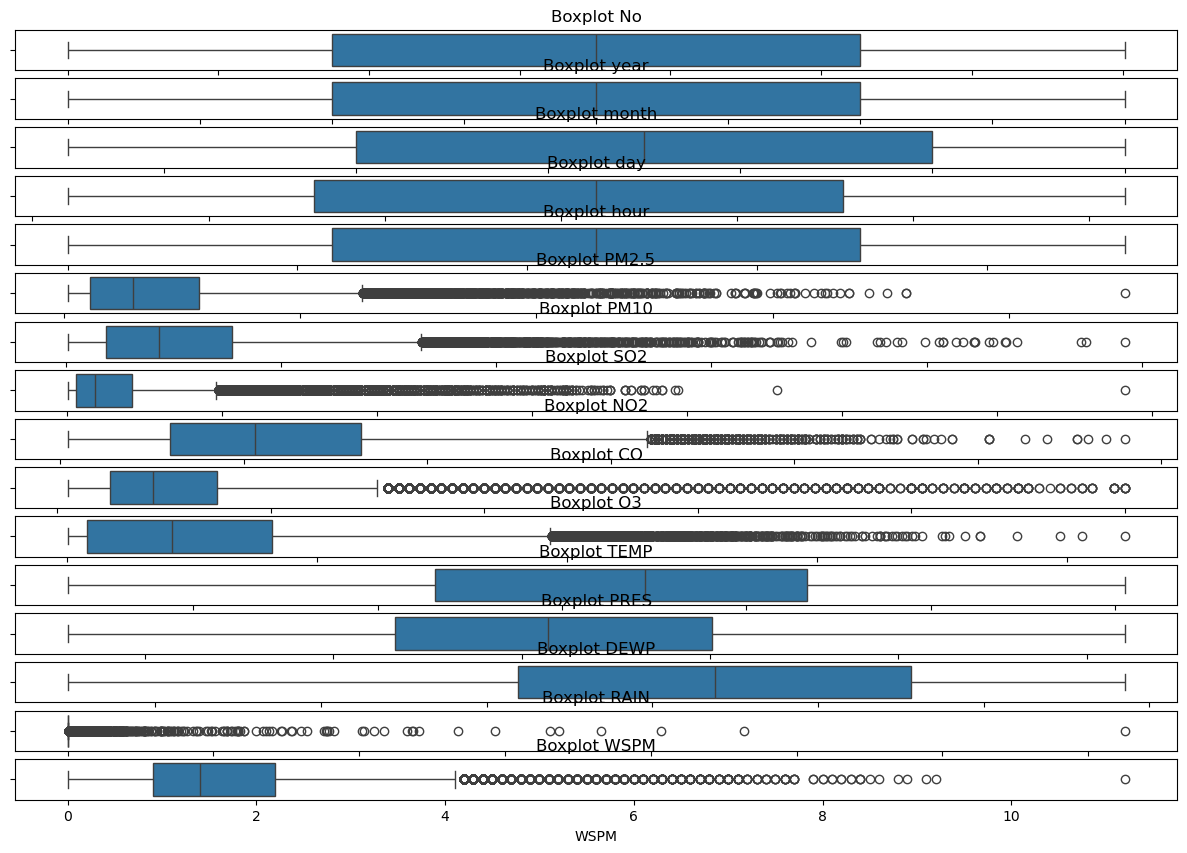

In [73]:
numeric_columns = df_Aotizhongxin.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))  
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  
    sns.boxplot(x=df_Aotizhongxin[column])
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)

plt.show()


Ada bebrapaOutlier yang cukup banyak yang dapat mempengaruhi analisis.

### Cleaning Data

Imputasi Isi Nilai Hilang dengan Mean

Pisahkan kolom numerik dari kolom non-numerik

In [74]:
numeric_Aotizhongxin = df_Aotizhongxin.select_dtypes(include=['number'])
non_numeric_Aotizhongxin = df_Aotizhongxin.select_dtypes(exclude=['number'])

numeric_Changping = df_Changping.select_dtypes(include=['number'])
non_numeric_Changping = df_Changping.select_dtypes(exclude=['number'])

numeric_Dingling = df_Dingling.select_dtypes(include=['number'])
non_numeric_Dingling = df_Dingling.select_dtypes(exclude=['number'])

numeric_Dongsi = df_Dongsi.select_dtypes(include=['number'])
non_numeric_Dongsi = df_Dongsi.select_dtypes(exclude=['number'])

numeric_Guanyuan = df_Guanyuan.select_dtypes(include=['number'])
non_numeric_Guanyuan = df_Guanyuan.select_dtypes(exclude=['number'])

numeric_Gucheng = df_Gucheng.select_dtypes(include=['number'])
non_numeric_Gucheng = df_Gucheng.select_dtypes(exclude=['number'])

numeric_Huairou = df_Huairou.select_dtypes(include=['number'])
non_numeric_Huairou = df_Huairou.select_dtypes(exclude=['number'])

numeric_Nongzhanguan = df_Nongzhanguan.select_dtypes(include=['number'])
non_numeric_Nongzhanguan = df_Nongzhanguan.select_dtypes(exclude=['number'])

numeric_Shunyi = df_Shunyi.select_dtypes(include=['number'])
non_numeric_Shunyi = df_Shunyi.select_dtypes(exclude=['number'])

numeric_Tiantan = df_Tiantan.select_dtypes(include=['number'])
non_numeric_Tiantan = df_Tiantan.select_dtypes(exclude=['number'])

numeric_Wanliu = df_Wanliu.select_dtypes(include=['number'])
non_numeric_Wanliu = df_Wanliu.select_dtypes(exclude=['number'])

numeric_Wanshouxigong = df_Wanshouxigong.select_dtypes(include=['number'])
non_numeric_Wanshouxigong = df_Wanshouxigong.select_dtypes(exclude=['number'])


Imputasi untuk kolom numerik

In [75]:
datasets = [
    numeric_columns_Aotizhongxin, numeric_columns_Changping, numeric_columns_Dingling,
    numeric_columns_Dongsi, numeric_columns_Guanyuan, numeric_columns_Gucheng,
    numeric_columns_Huairou, numeric_columns_Nongzhanguan, numeric_columns_Shunyi,
    numeric_columns_Tiantan, numeric_columns_Wanliu, numeric_columns_Wanshouxigong
]

for data in datasets:
    data.fillna(data.mean(numeric_only=True), inplace=True)


Imputasi untuk kolom non-numerik 

In [76]:
for column_data in [
    non_numeric_columns_Aotizhongxin, non_numeric_columns_Changping,
    non_numeric_columns_Dingling, non_numeric_columns_Dongsi,
    non_numeric_columns_Guanyuan, non_numeric_columns_Gucheng,
    non_numeric_columns_Huairou, non_numeric_columns_Nongzhanguan,
    non_numeric_columns_Shunyi, non_numeric_columns_Tiantan,
    non_numeric_columns_Wanliu, non_numeric_columns_Wanshouxigong
]:
    column_data.fillna(column_data.mode().iloc[0], inplace=True)


Gabungkan kembali kolom numerik dan non-numerik

In [77]:
df_Aotizhongxin_final = pd.concat([numeric_columns_Aotizhongxin, non_numeric_columns_Aotizhongxin], axis=1)
df_Changping_final = pd.concat([numeric_columns_Changping, non_numeric_columns_Changping], axis=1)
df_Dingling_final = pd.concat([numeric_columns_Dingling, non_numeric_columns_Dingling], axis=1)
df_Dongsi_final = pd.concat([numeric_columns_Dongsi, non_numeric_columns_Dongsi], axis=1)
df_Guanyuan_final = pd.concat([numeric_columns_Guanyuan, non_numeric_columns_Guanyuan], axis=1)
df_Gucheng_final = pd.concat([numeric_columns_Gucheng, non_numeric_columns_Gucheng], axis=1)
df_Huairou_final = pd.concat([numeric_columns_Huairou, non_numeric_columns_Huairou], axis=1)
df_Nongzhanguan_final = pd.concat([numeric_columns_Nongzhanguan, non_numeric_columns_Nongzhanguan], axis=1)
df_Shunyi_final = pd.concat([numeric_columns_Shunyi, non_numeric_columns_Shunyi], axis=1)
df_Tiantan_final = pd.concat([numeric_columns_Tiantan, non_numeric_columns_Tiantan], axis=1)
df_Wanliu_final = pd.concat([numeric_columns_Wanliu, non_numeric_columns_Wanliu], axis=1)
df_Wanshouxigong_final = pd.concat([numeric_columns_Wanshouxigong, non_numeric_columns_Wanshouxigong], axis=1)


Cek nilai yang hilang setelah imputasi

In [78]:
dataframes = {
    "Aotizhongxin": df_Aotizhongxin_final,
    "Changping": df_Changping_final,
    "Dingling": df_Dingling_final,
    "Dongsi": df_Dongsi_final,
    "Guanyuan": df_Guanyuan_final,
    "Gucheng": df_Gucheng_final,
    "Huairou": df_Huairou_final,
    "Nongzhanguan": df_Nongzhanguan_final,
    "Shunyi": df_Shunyi_final,
    "Tiantan": df_Tiantan_final,
    "Wanliu": df_Wanliu_final,
    "Wanshouxigong": df_Wanshouxigong_final
}

for name, df in dataframes.items():
    missing_values = df.isnull().sum()
    print(f"Jumlah data yang hilang di {name}:\n{missing_values}\n")


Jumlah data yang hilang di Aotizhongxin:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
wd         0
station    0
dtype: int64

Jumlah data yang hilang di Changping:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
wd         0
station    0
dtype: int64

Jumlah data yang hilang di Dingling:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
WSPM       0
wd         0
station    0
dtype: int64

Jumlah data yang hilang di Dongsi:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
N

Winsorization untuk mengatasi outlier

In [79]:
def winsorize_dataframe(dataframe, lower=0.05, upper=0.95):
    modified_df = dataframe.copy()
    for col in modified_df.select_dtypes(include=['number']).columns:
        low_threshold = modified_df[col].quantile(lower)
        high_threshold = modified_df[col].quantile(upper)
        modified_df[col] = modified_df[col].clip(lower=low_threshold, upper=high_threshold)
    return modified_df

stations = [df_Aotizhongxin, df_Changping, df_Dingling, df_Dongsi, df_Guanyuan, 
            df_Gucheng, df_Huairou, df_Nongzhanguan, df_Shunyi, df_Tiantan, 
            df_Wanliu, df_Wanshouxigong]

winsorized_stations = {f"winsorized_{i}": winsorize_dataframe(station) for i, station in enumerate(stations)}


Boxplots setelah winsorized untuk mengecek apakah masih ada outlier

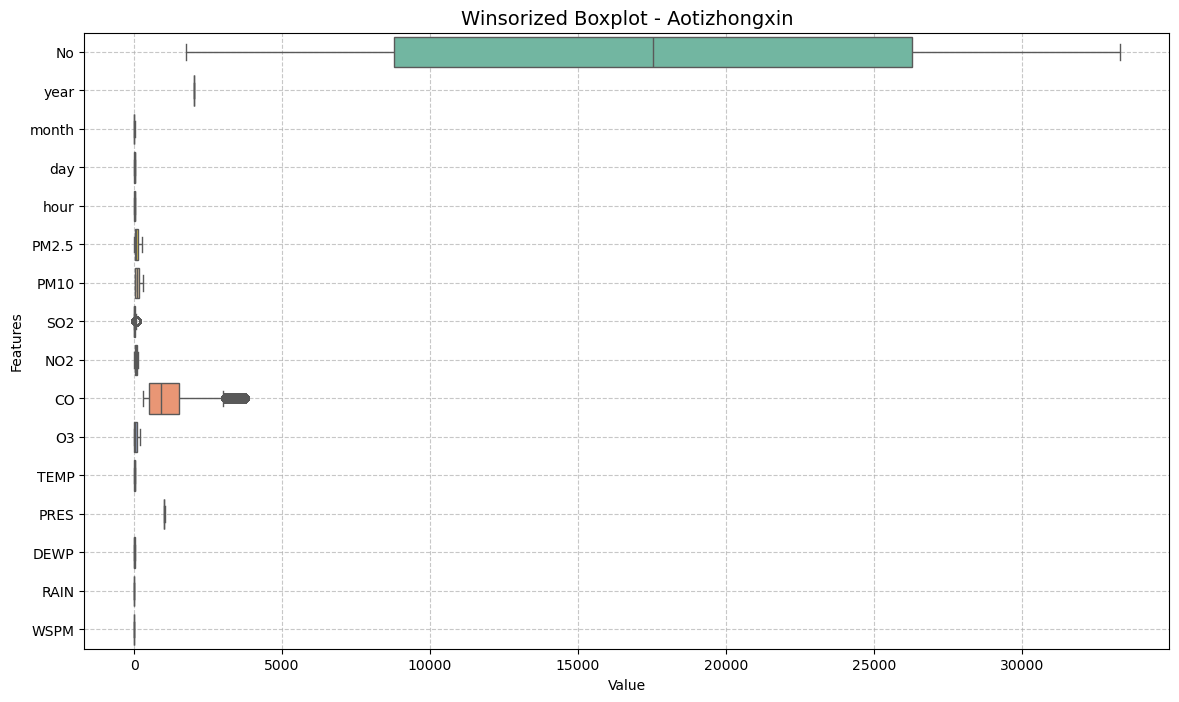

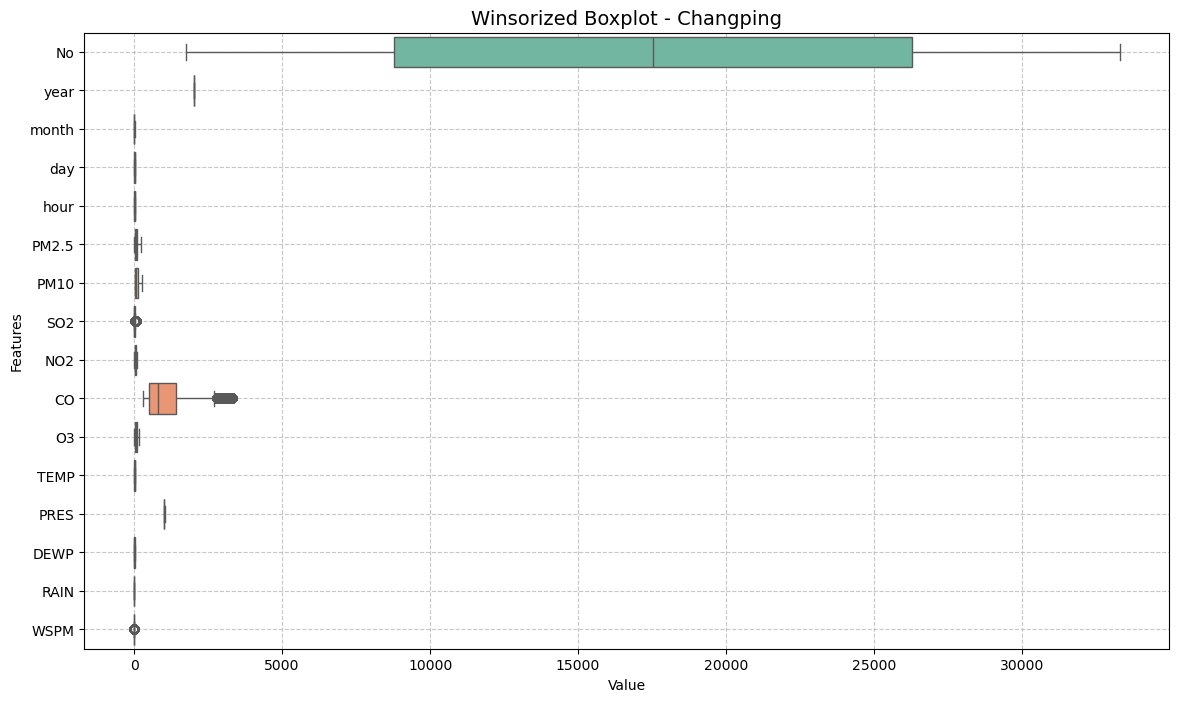

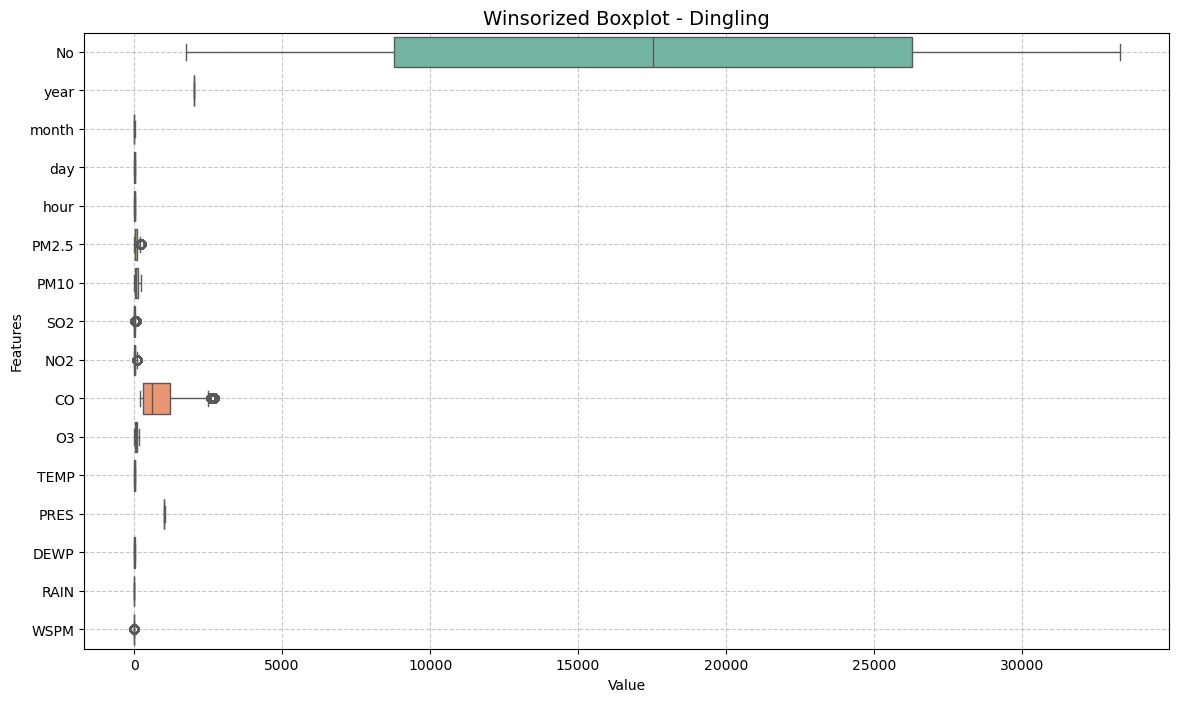

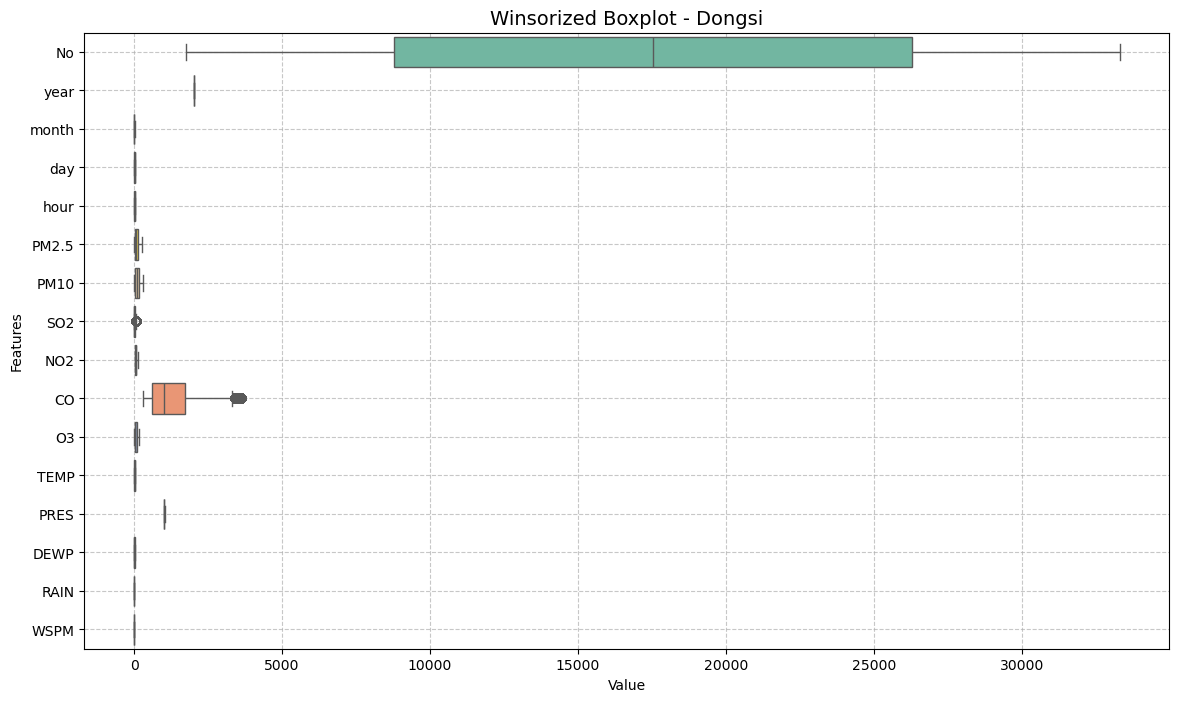

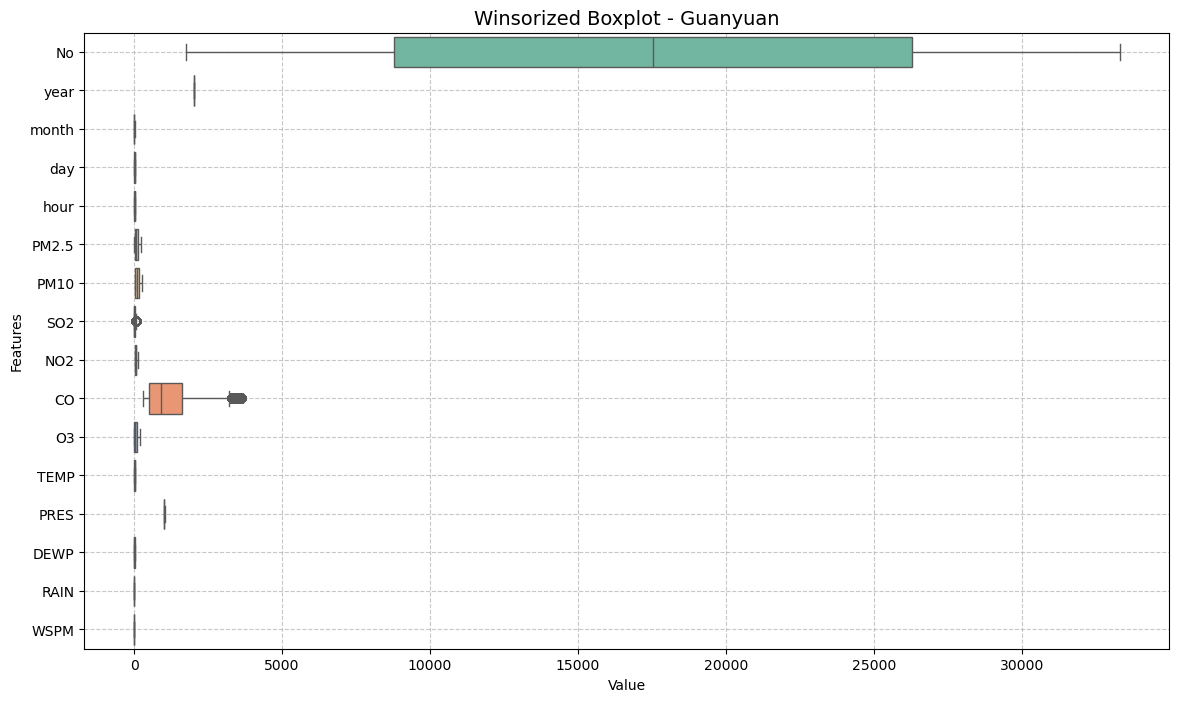

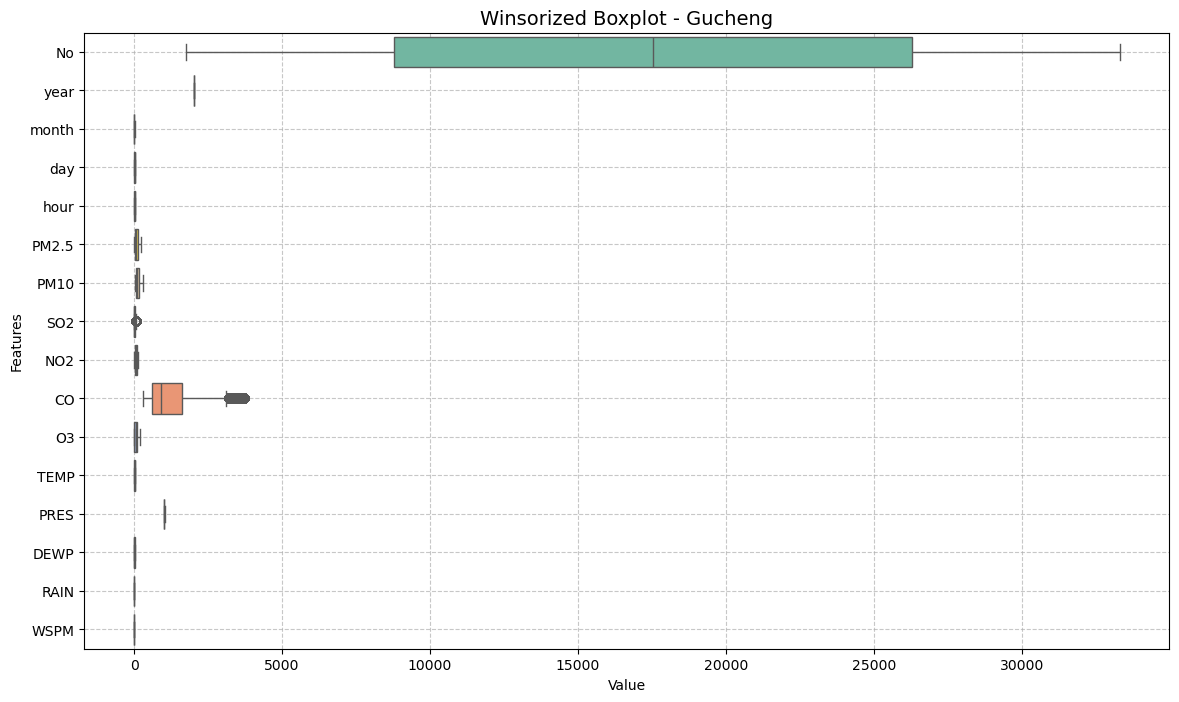

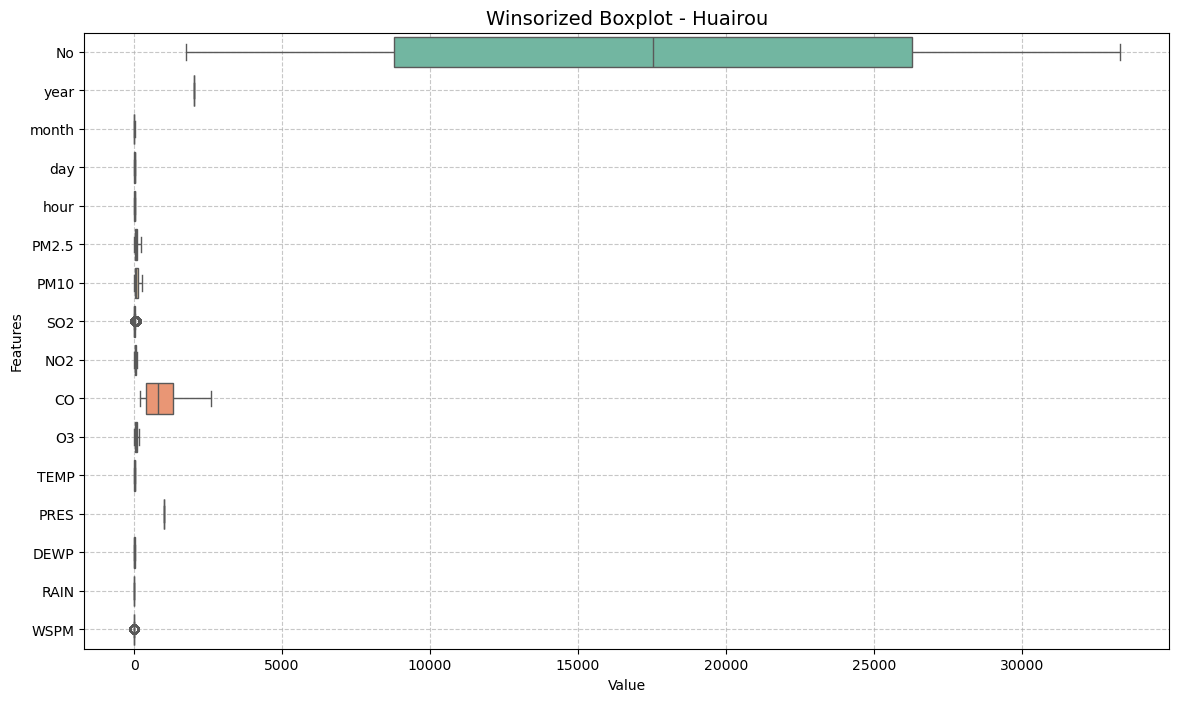

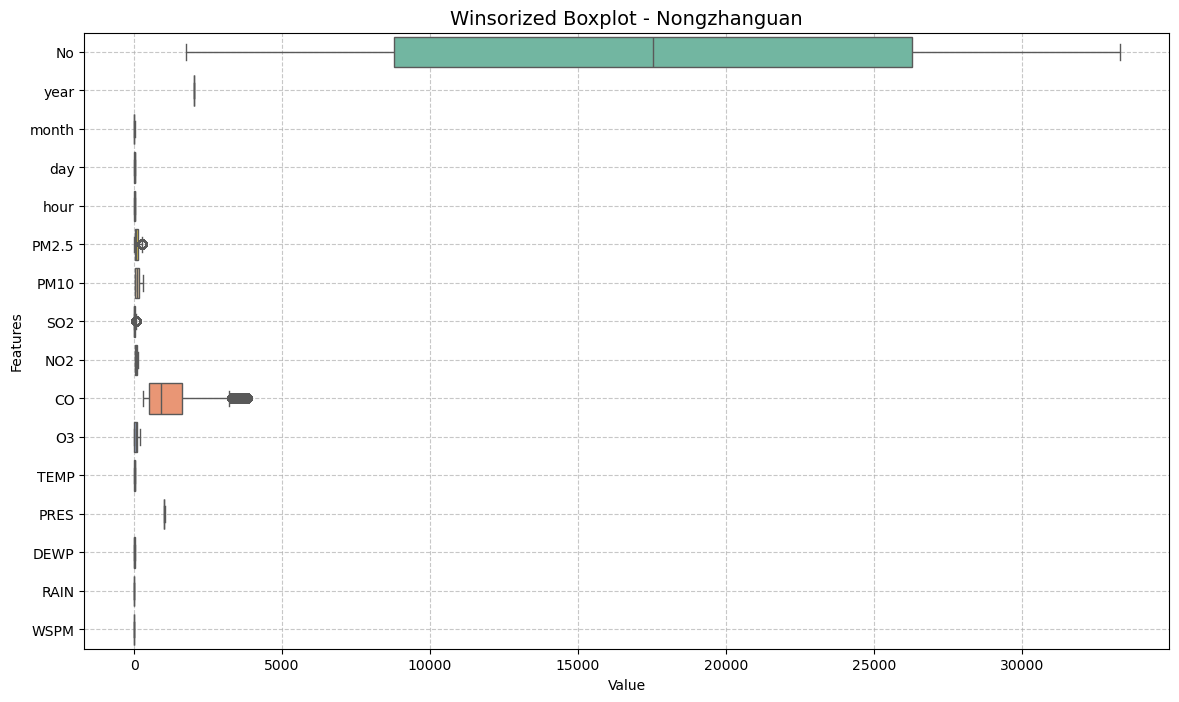

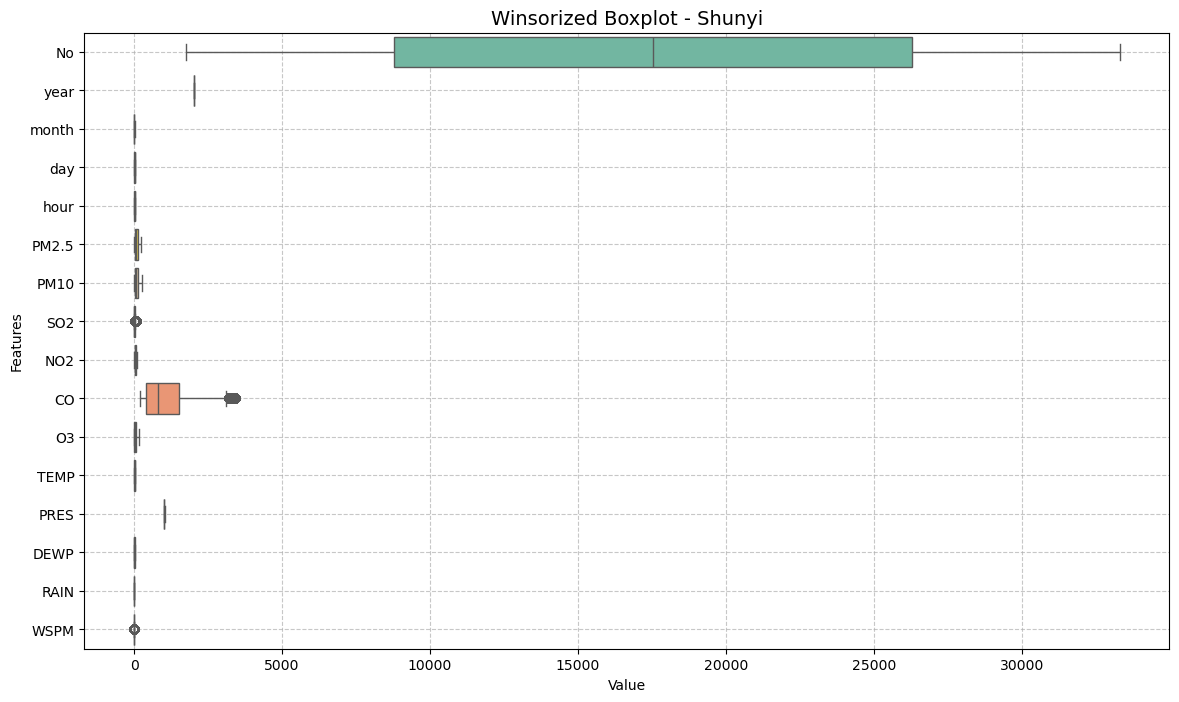

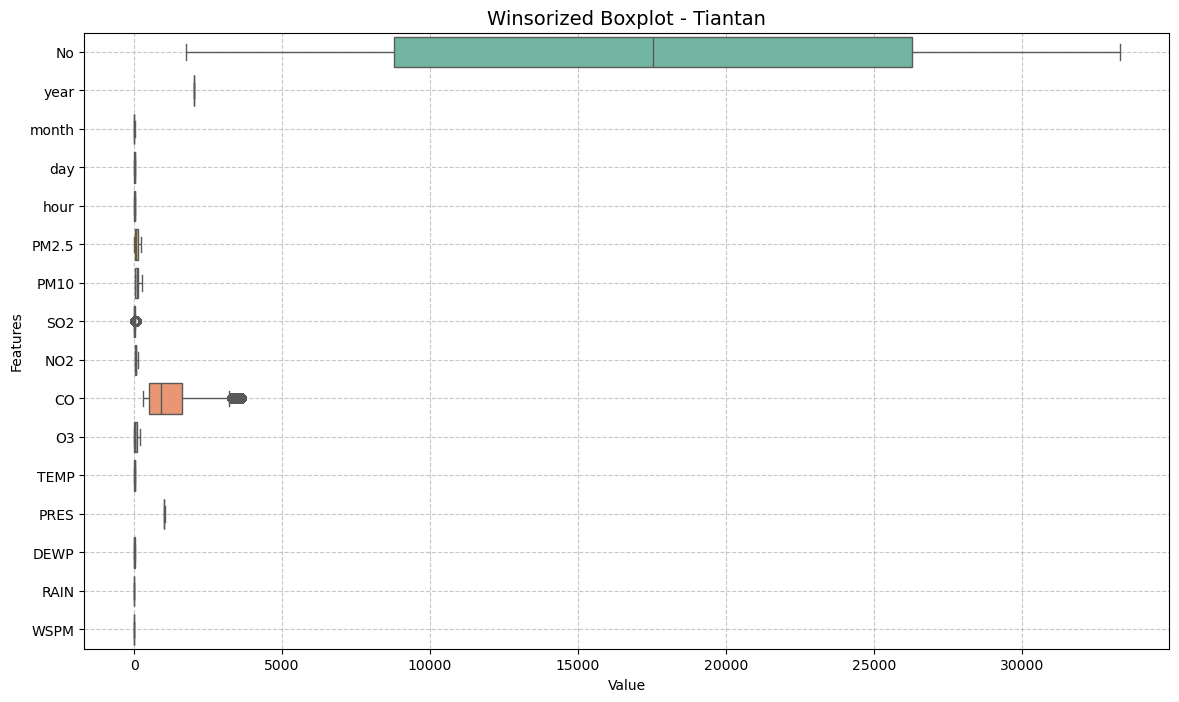

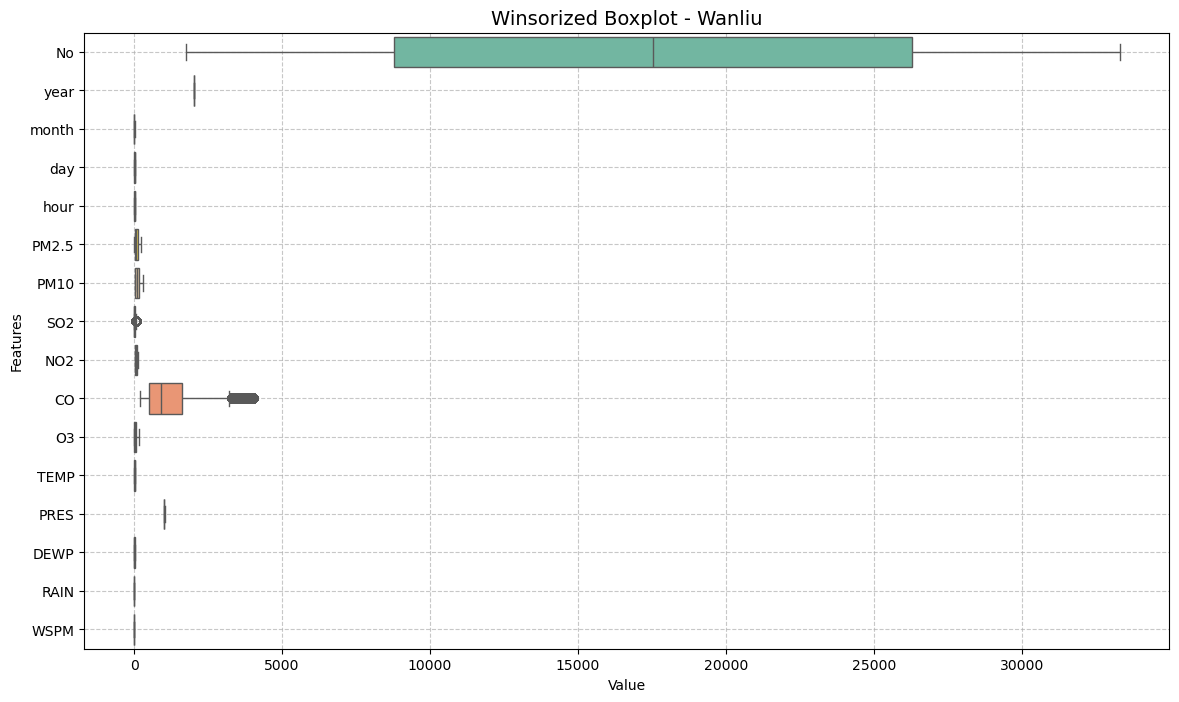

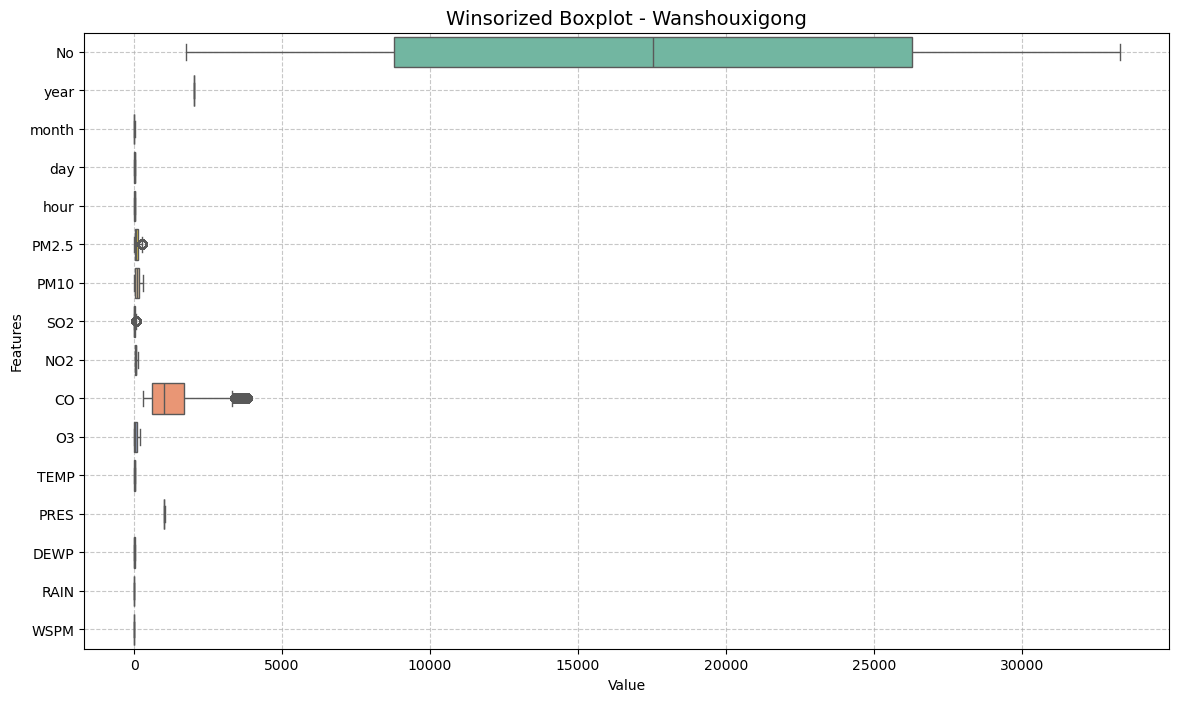

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_winsorized_boxplots(dataframe, location_name, fig_size=(14, 8)):
    """
    Menampilkan boxplot untuk data setelah proses Winsorizing.
    """
    plt.figure(figsize=fig_size)
    sns.boxplot(data=dataframe, orient='h', palette="Set2")
    plt.title(f'Winsorized Boxplot - {location_name}', fontsize=14)
    plt.xlabel('Value')
    plt.ylabel('Features')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Memanggil fungsi untuk setiap dataset lokasi
locations = {
    "Aotizhongxin": df_Aotizhongxin_winsorized,
    "Changping": df_Changping_winsorized,
    "Dingling": df_Dingling_winsorized,
    "Dongsi": df_Dongsi_winsorized,
    "Guanyuan": df_Guanyuan_winsorized,
    "Gucheng": df_Gucheng_winsorized,
    "Huairou": df_Huairou_winsorized,
    "Nongzhanguan": df_Nongzhanguan_winsorized,
    "Shunyi": df_Shunyi_winsorized,
    "Tiantan": df_Tiantan_winsorized,
    "Wanliu": df_Wanliu_winsorized,
    "Wanshouxigong": df_Wanshouxigong_winsorized
}

for name, df in locations.items():
    visualize_winsorized_boxplots(df, name)


Fixed data type

In [83]:
dataframes = [
    df_Aotizhongxin, df_Changping, df_Dingling, df_Dongsi,
    df_Guanyuan, df_Gucheng, df_Huairou, df_Nongzhanguan,
    df_Shunyi, df_Tiantan, df_Wanliu, df_Wanshouxigong
]

df_names = [
    "df_Aotizhongxin", "df_Changping", "df_Dingling", "df_Dongsi",
    "df_Guanyuan", "df_Gucheng", "df_Huairou", "df_Nongzhanguan",
    "df_Shunyi", "df_Tiantan", "df_Wanliu", "df_Wanshouxigong"
]

for df in dataframes:
    df["date_time"] = pd.to_datetime(df.loc[:, ["year", "month", "day", "hour"]])

for name, df in zip(df_names, dataframes):
    print(f"{name} data types:\n", df.dtypes, "\n")


df_Aotizhongxin data types:
 No                    int64
year                  int64
month                 int64
day                   int64
hour                  int64
PM2.5               float64
PM10                float64
SO2                 float64
NO2                 float64
CO                  float64
O3                  float64
TEMP                float64
PRES                float64
DEWP                float64
RAIN                float64
wd                   object
WSPM                float64
station              object
date_time    datetime64[ns]
dtype: object 

df_Changping data types:
 No                    int64
year                  int64
month                 int64
day                   int64
hour                  int64
PM2.5               float64
PM10                float64
SO2                 float64
NO2                 float64
CO                  float64
O3                  float64
TEMP                float64
PRES                float64
DEWP                float64
RAIN 

## Exploratory Data Analysis (EDA)

Gabungkan data

In [84]:
import pandas as pd

# Menggabungkan beberapa DataFrame menjadi satu
dataframes = [df_Aotizhongxin, df_Changping, df_Dingling, df_Dongsi, 
              df_Guanyuan, df_Gucheng, df_Huairou, df_Nongzhanguan, 
              df_Shunyi, df_Tiantan, df_Wanliu, df_Wanshouxigong]

df_combined = pd.concat(dataframes, ignore_index=True)


Mengonversi kolom date_time ke tipe datetime

In [85]:
df_all['date_time'] = pd.to_datetime(df_all.loc[:, ['year', 'month', 'day', 'hour']])

Analisis Deskriptif

In [87]:
print(df_all.describe())

                  No           year          month            day  \
count  382168.000000  382168.000000  382168.000000  382168.000000   
mean    17955.931070    2014.714905       6.475087      15.711308   
min         1.000000    2013.000000       1.000000       1.000000   
25%      9610.000000    2014.000000       3.000000       8.000000   
50%     18103.000000    2015.000000       6.000000      16.000000   
75%     26515.000000    2016.000000       9.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   
std     10001.787087       1.160266       3.449317       8.803064   

                hour          PM2.5           PM10            SO2  \
count  382168.000000  382168.000000  382168.000000  382168.000000   
mean       11.575184      79.432383     104.573837      15.634814   
min         0.000000       2.000000       2.000000       0.285600   
25%         6.000000      20.000000      36.000000       2.000000   
50%        12.000000      55.0000

Cek missing value

In [33]:
print(df_all.isnull().sum())

No               0
year             0
month            0
day              0
hour             0
PM2.5         8739
PM10          6449
SO2           9021
NO2          12116
CO           20701
O3           13277
TEMP           398
PRES           393
DEWP           403
RAIN           390
wd            1822
WSPM           318
station          0
date_time        0
dtype: int64


Drop missing value

In [90]:
df_all= df_all.dropna()


Mendeteksi dan menghitung baris dengan index duplikat

In [91]:
print(df_all.index.duplicated().sum())


0


Mendeteksi dan menampilkan kolom duplikat 

In [92]:
print(df_all.columns[df_all.columns.duplicated()])


Index([], dtype='object')


In [93]:
df_all = df_all.loc[:, ~df_all.columns.duplicated()]


In [94]:
df_all.to_csv('clean_df_all.csv', index=False)


Hubungan Angin dengan Persebaran PM2.5

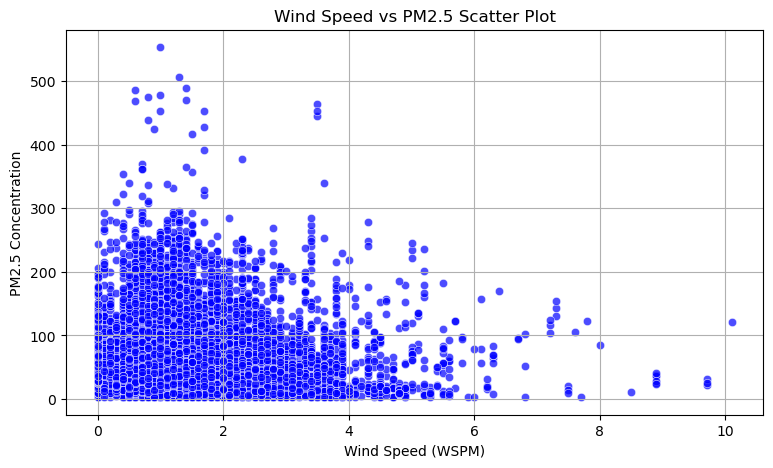

In [96]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df_all, x='WSPM', y='PM2.5', alpha=0.7, color='blue')
plt.xlabel('Wind Speed (WSPM)')
plt.ylabel('PM2.5 Concentration')
plt.title('Wind Speed vs PM2.5 Scatter Plot')
plt.grid(True)
plt.show()

Korelasi antara variabel

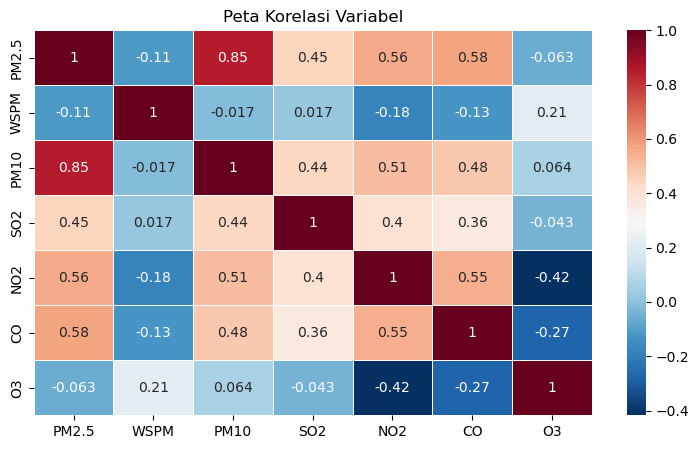

In [97]:
# Menghitung matriks korelasi untuk fitur tertentu
selected_features = ['PM2.5', 'WSPM', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
korelasi_matrix = df_all[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(korelasi_matrix, annot=True, cmap='RdBu_r', linewidths=0.5)
plt.title('Peta Korelasi Variabel')
plt.show()


Konsentrasi Polutan dari Kendaraan Bermotor atau bahan bakar fosil (CO & NO2)

/tmp/ipykernel_156/701223077.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df_all.set_index('date_time')[['CO', 'NO2']].resample('M').mean().reset_index()


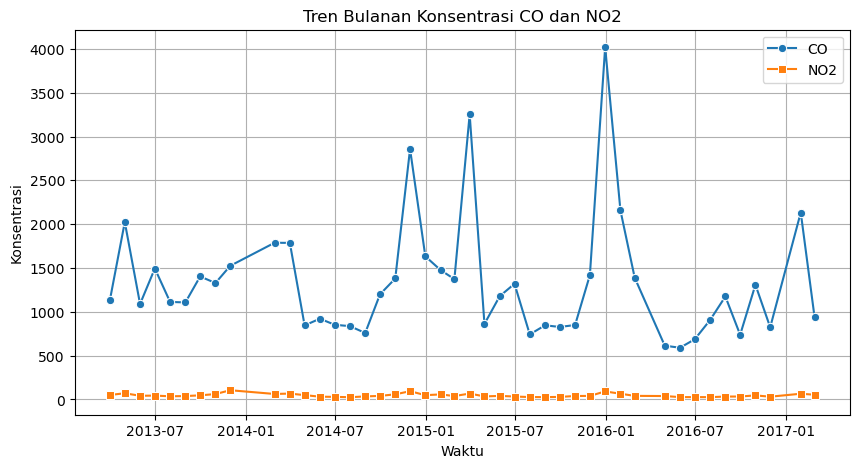

In [98]:
# Resampling data per bulan dan menghitung rata-rata
df_grouped = df_all.set_index('date_time')[['CO', 'NO2']].resample('M').mean().reset_index()

# Membuat visualisasi
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='date_time', y='CO', label='CO', marker='o')
sns.lineplot(data=df_grouped, x='date_time', y='NO2', label='NO2', marker='s')

plt.xlabel('Waktu')
plt.ylabel('Konsentrasi')
plt.title('Tren Bulanan Konsentrasi CO dan NO2')
plt.legend()
plt.grid(True)
plt.show()

Kaitan Hujan dengan Tingkat Polutan

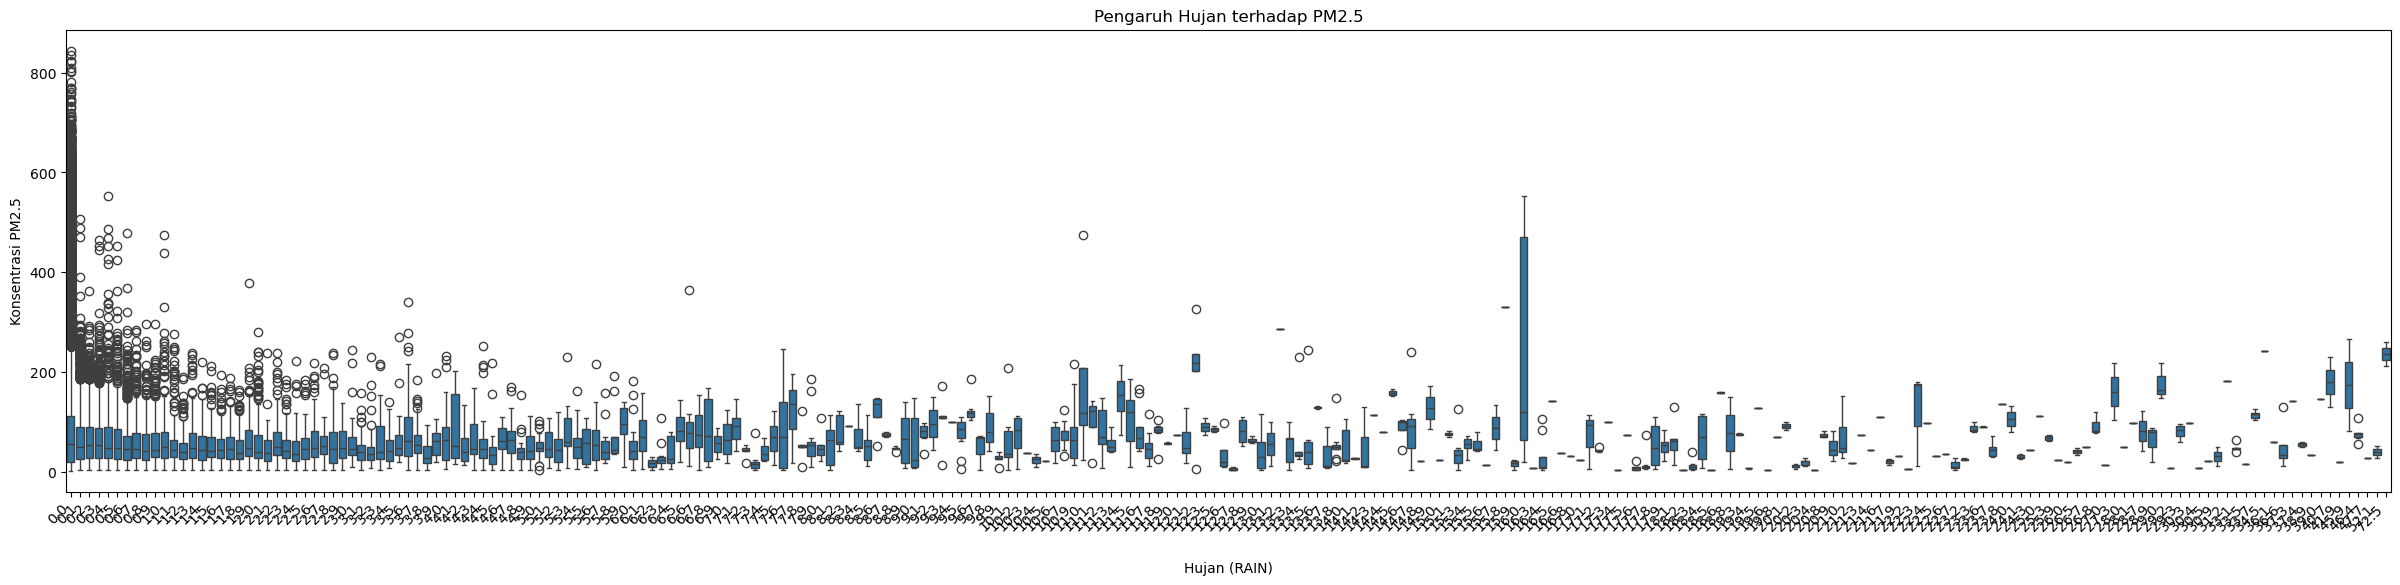

In [42]:

df_all = df_all.reset_index(drop=True)
plt.figure(figsize=(30, 6))
sns.boxplot(x='RAIN', y='PM2.5', data=df_all)
plt.title('Pengaruh Hujan terhadap PM2.5')
plt.xlabel('Hujan (RAIN)', labelpad=20)  
plt.ylabel('Konsentrasi PM2.5')


plt.xticks(rotation=45, ha='right')

plt.show()




Kaitan Polutan NO2 dan CO dengan O3

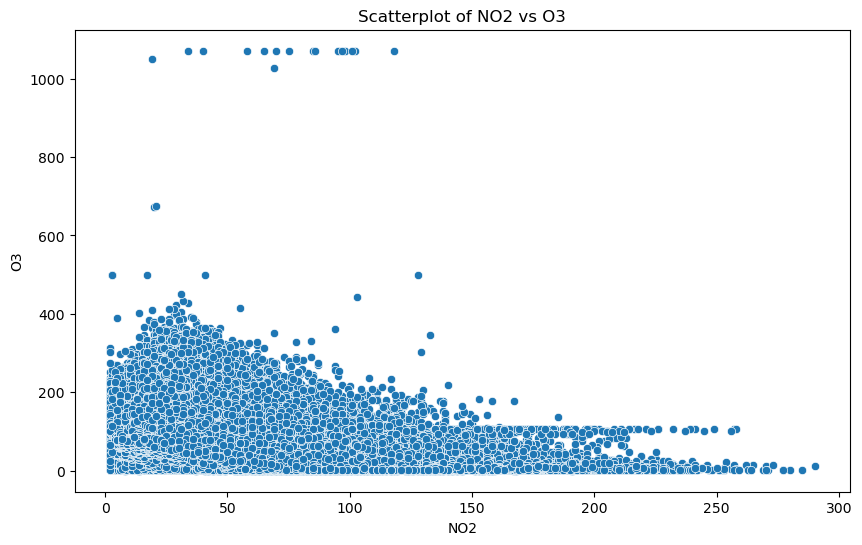

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2', y='O3', data=df_all)
plt.title('Scatterplot of NO2 vs O3')
plt.show()

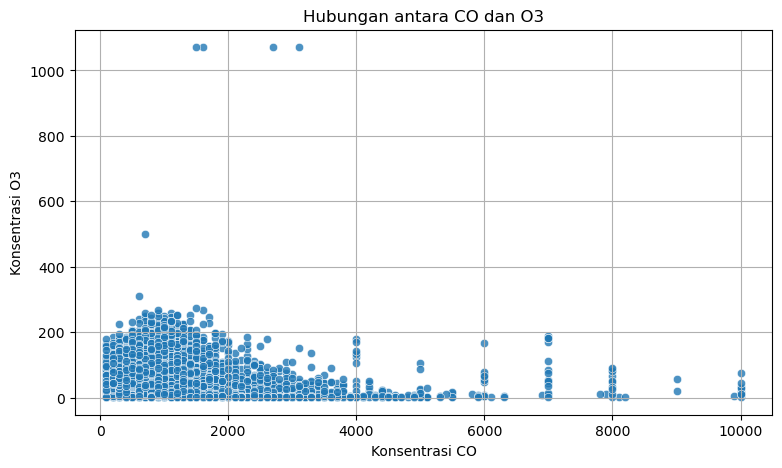

In [103]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df_all, x='CO', y='O3', alpha=0.8)
plt.title('Hubungan antara CO dan O3')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Konsentrasi O3')
plt.grid(True)
plt.show()


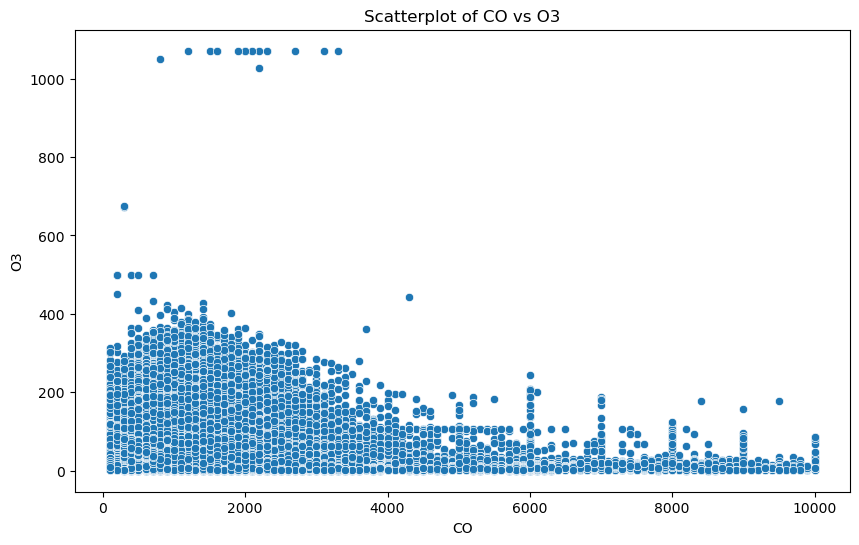

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO', y='O3', data=df_all)
plt.title('Scatterplot of CO vs O3')
plt.show()

Correlation Heatmap khusus O3 dengan polutan lain

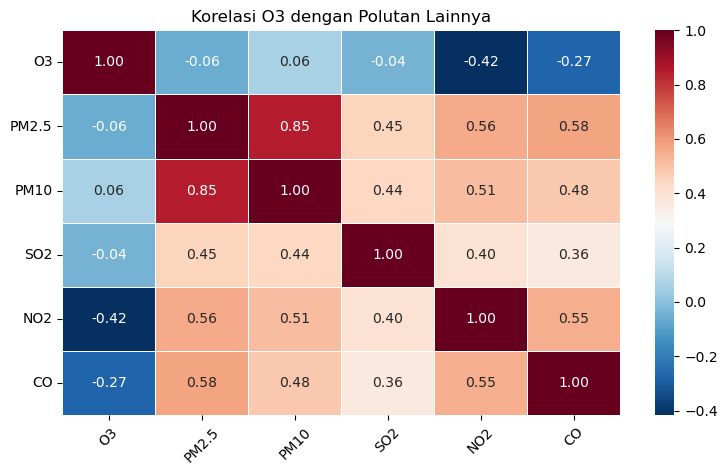

In [105]:
corr_matrix = df_all.loc[:, ['O3', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO']].corr()
plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5)
plt.title('Korelasi O3 dengan Polutan Lainnya')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa besar dampak kecepatan angin (WSPM) terhadap distribusi konsentrasi PM2.5 selama periode musim kemarau (Juni–Agustus)?

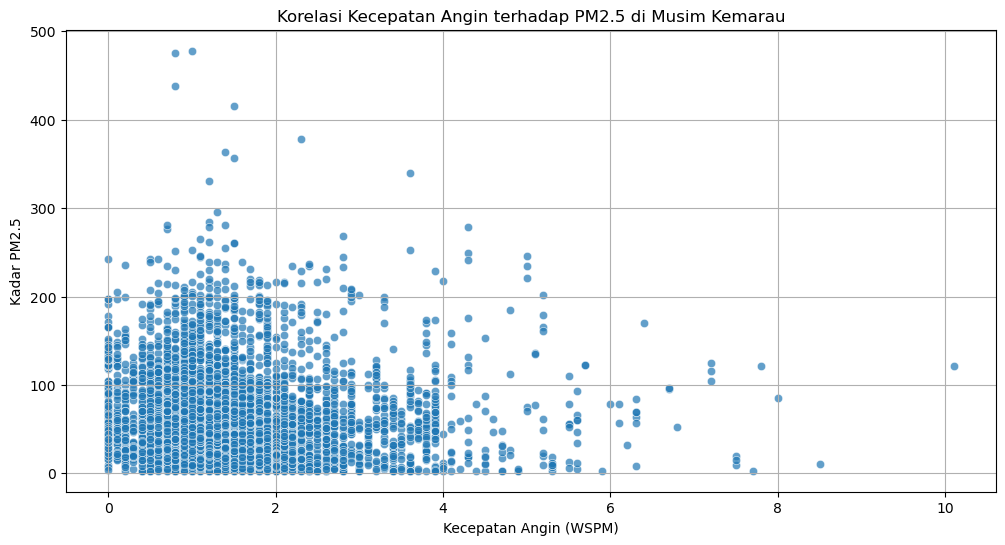

In [106]:
df_all['bulan'] = df_all['date_time'].dt.month

kemarau = df_all[df_all['bulan'].between(6, 8)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=kemarau, x='WSPM', y='PM2.5', alpha=0.7)
plt.title('Korelasi Kecepatan Angin terhadap PM2.5 di Musim Kemarau')
plt.xlabel('Kecepatan Angin (WSPM)')
plt.ylabel('Kadar PM2.5')
plt.grid(True)
plt.show()

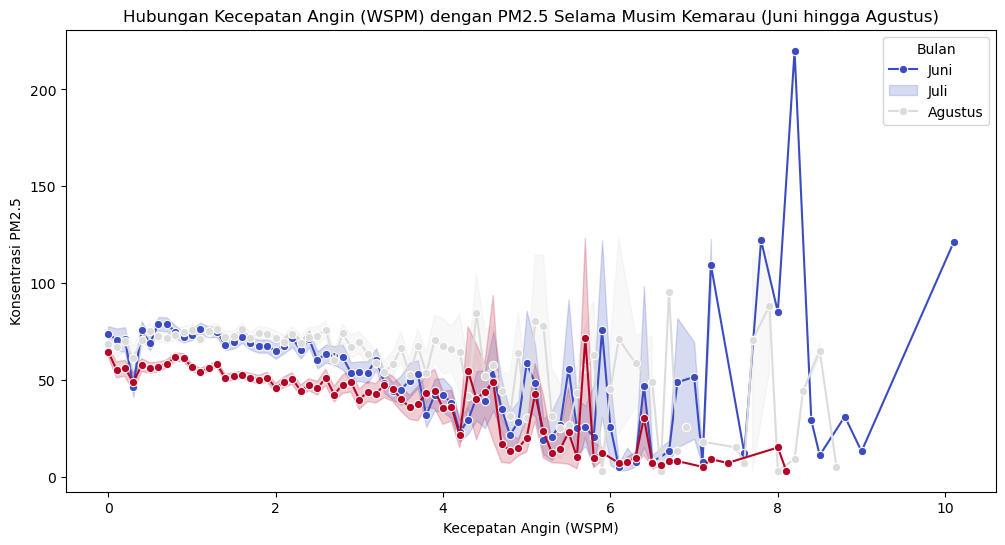

In [47]:
dry_season_data = df_all[df_all['month'].isin([6, 7, 8])]

monthly_avg = dry_season_data.groupby(['year', 'month']).agg({'WSPM': 'mean', 'PM2.5': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='WSPM', y='PM2.5', hue='month', data=dry_season_data, marker='o', palette='coolwarm')
plt.title('Hubungan Kecepatan Angin (WSPM) dengan PM2.5 Selama Musim Kemarau (Juni hingga Agustus)')
plt.xlabel('Kecepatan Angin (WSPM)')
plt.ylabel('Konsentrasi PM2.5')
plt.legend(title='Bulan', labels=['Juni', 'Juli', 'Agustus'])
plt.show()


### Pertanyaan 2: Bagaimana dampak konsentrasi NO2 dan CO sebagai polutan dari kendaraan bermotor terhadap kualitas udara?

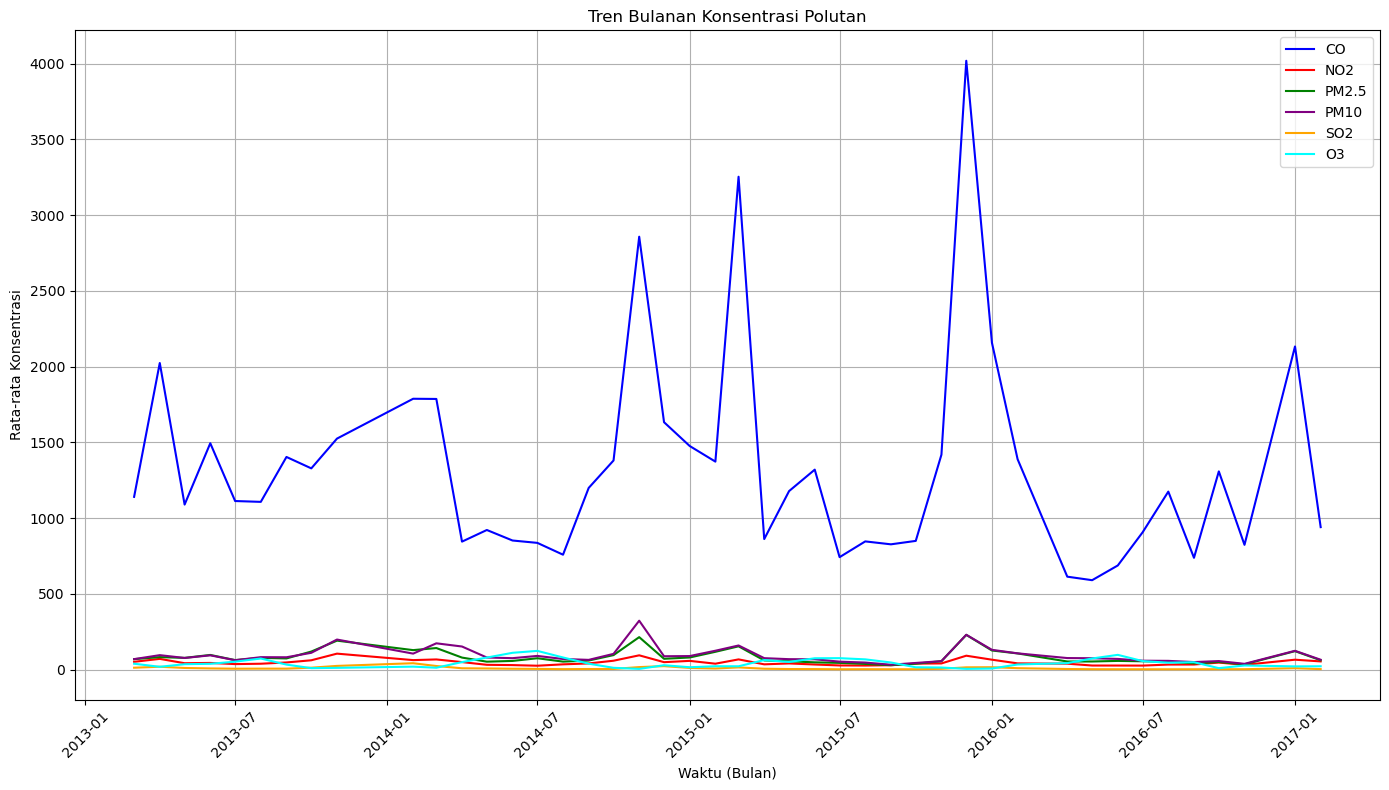

In [110]:
df_all['month_year'] = df_all['date_time'].dt.to_period('M')

data_monthly = df_all.groupby('month_year')[['CO', 'NO2', 'PM2.5', 'PM10', 'SO2', 'O3']].mean().reset_index()

data_monthly['month_year'] = data_monthly['month_year'].dt.to_timestamp()

plt.figure(figsize=(14, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']
labels = ['CO', 'NO2', 'PM2.5', 'PM10', 'SO2', 'O3']

for col, color in zip(labels, colors):
    sns.lineplot(x='month_year', y=col, data=data_monthly, label=col, color=color)

plt.title('Tren Bulanan Konsentrasi Polutan')
plt.xlabel('Waktu (Bulan)')
plt.ylabel('Rata-rata Konsentrasi')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana dampak hujan terhadap zat pencemar yang menyebabkan polusi udara?

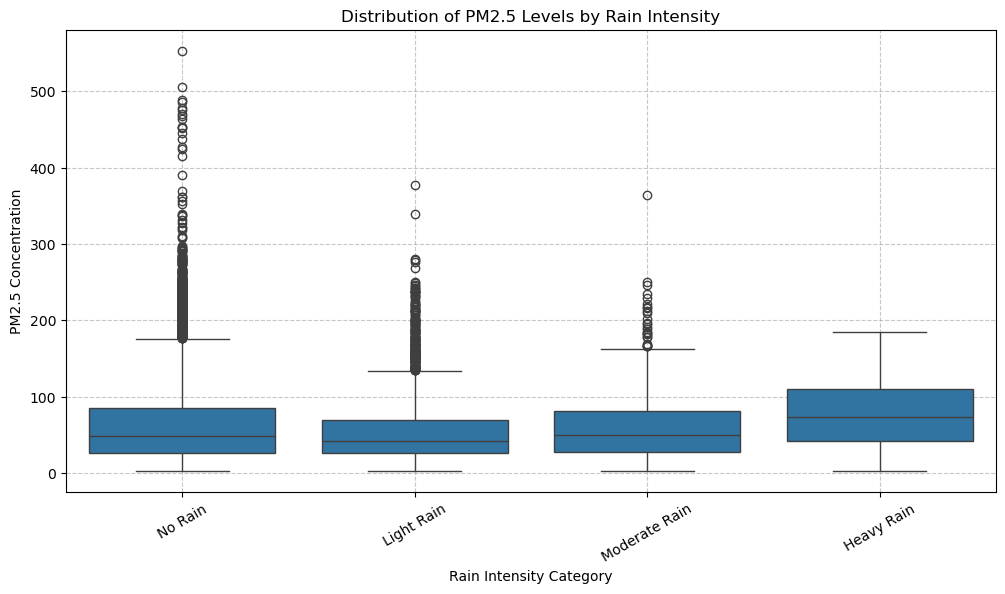

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorisasi hujan berdasarkan intensitas
df_all['RAIN_CATEGORY'] = pd.cut(df_all['RAIN'], bins=[0, 1, 4, 8, 10], 
                                 labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])

# Plot boxplot untuk melihat distribusi PM2.5 berdasarkan kategori hujan
plt.figure(figsize=(12, 6))
sns.boxplot(x='RAIN_CATEGORY', y='PM2.5', data=df_all)
plt.title('Distribution of PM2.5 Levels by Rain Intensity')
plt.xlabel('Rain Intensity Category')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

/tmp/ipykernel_156/2473265533.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_group_avg = df_all.groupby('RAIN_GROUP')['PM2.5'].mean().reset_index()


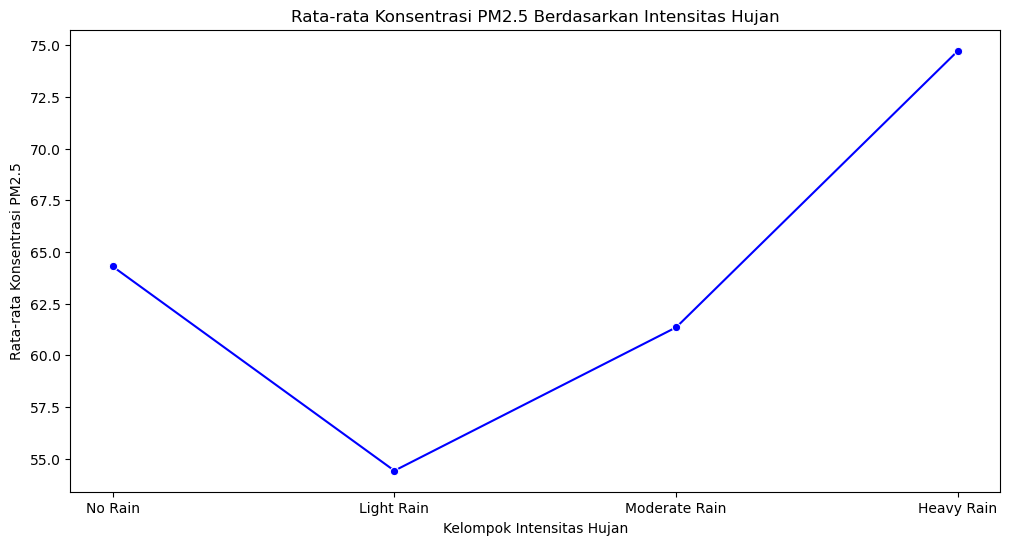

In [113]:
df_all['RAIN_GROUP'] = pd.cut(df_all['RAIN'], bins=[0, 1, 4, 8, 10], labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])

rain_group_avg = df_all.groupby('RAIN_GROUP')['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='RAIN_GROUP', y='PM2.5', data=rain_group_avg, marker='o', color='blue')

plt.title('Rata-rata Konsentrasi PM2.5 Berdasarkan Intensitas Hujan')
plt.xlabel('Kelompok Intensitas Hujan')
plt.ylabel('Rata-rata Konsentrasi PM2.5')

plt.show()


### Pertanyaan 4: Bagaimana keterkaitan antara kadar NO₂ dan CO dengan proses pembentukan O₃?

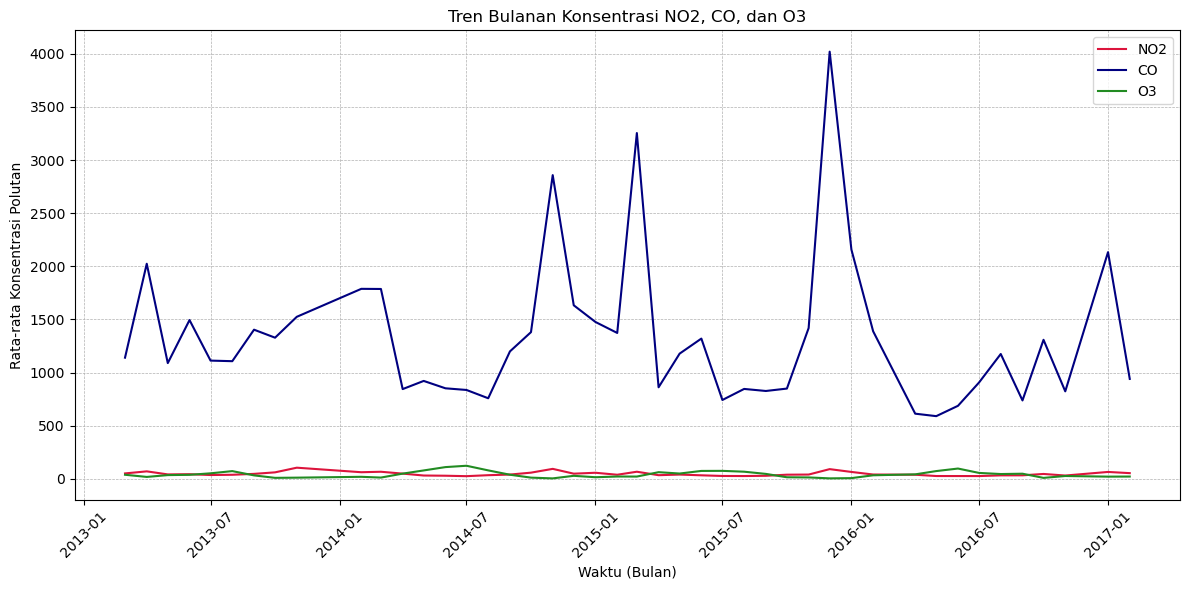

In [114]:
df_all['month_period'] = df_all['date_time'].dt.to_period('M')

avg_monthly = df_all.groupby('month_period')[['NO2', 'CO', 'O3']].mean().reset_index()

avg_monthly['month_period'] = avg_monthly['month_period'].dt.to_timestamp()

plt.figure(figsize=(12, 6))

sns.lineplot(data=avg_monthly, x='month_period', y='NO2', label='NO2', color='crimson')
sns.lineplot(data=avg_monthly, x='month_period', y='CO', label='CO', color='navy')
sns.lineplot(data=avg_monthly, x='month_period', y='O3', label='O3', color='forestgreen')

plt.title('Tren Bulanan Konsentrasi NO2, CO, dan O3')
plt.xlabel('Waktu (Bulan)')
plt.ylabel('Rata-rata Konsentrasi Polutan')
plt.legend()

plt.xticks(rotation=45)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

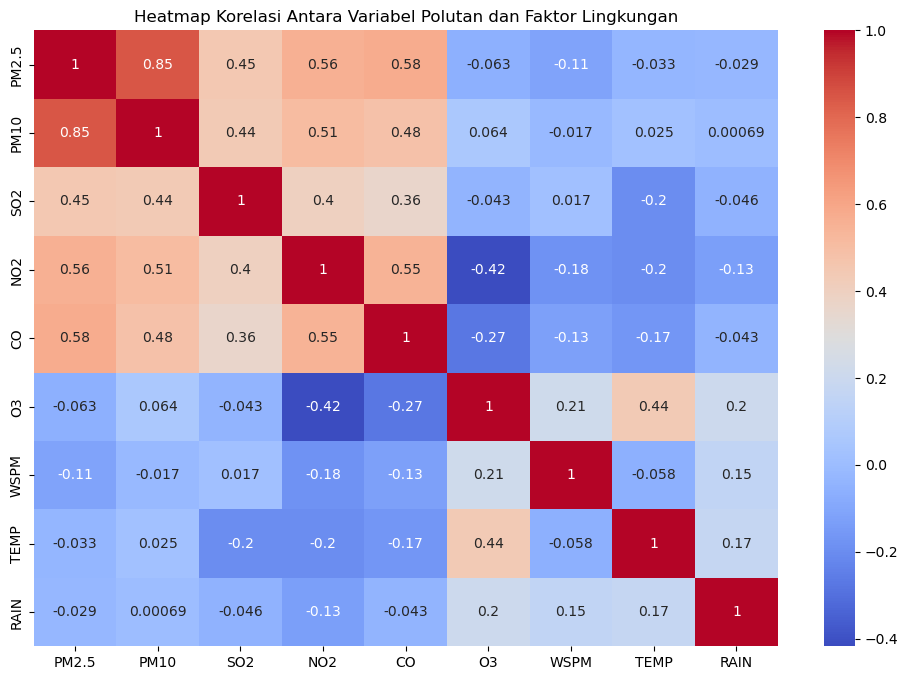

In [115]:
corr_matrix = df_all[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM', 'TEMP', 'RAIN']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antara Variabel Polutan dan Faktor Lingkungan')
plt.show()


## Conclusion

Dari hasil analisis, dapat disimpulkan bahwa:

1. Kecepatan angin (WSPM) memiliki peran penting dalam penyebaran polutan. Ketika angin bertiup kencang, konsentrasi PM2.5 cenderung berkurang karena polutan menyebar lebih luas, menciptakan tren negatif antara kecepatan angin dan kadar PM2.5. Namun, dalam kondisi angin sedang, polutan dapat terkumpul di suatu area, sehingga konsentrasinya justru meningkat.

2. Kenaikan kadar CO dan NO₂ seringkali mengindikasikan peningkatan aktivitas kendaraan bermotor atau pembakaran bahan bakar fosil. Ini menunjukkan bahwa kendaraan dan bahan bakar fosil memiliki kontribusi signifikan dalam pencemaran udara.

3. Hujan dapat membantu mengurangi kadar polutan, termasuk PM2.5, karena polutan terbawa turun bersama air hujan, sehingga menyebabkan penurunan konsentrasi polutan. Namun, dalam kasus hujan deras, PM2.5 dapat meningkat akibat pengadukan partikel dari tanah atau reaksi lainnya.

4. Konsentrasi NO₂ dan CO berpengaruh terhadap pembentukan O3. Ketika kadar NO₂ meningkat, kadar O3 akan cenderung turun, dan sebaliknya. NO₂ dapat berperan dalam reaksi yang mengurangi O3 di atmosfer. Di lingkungan dengan CO yang tinggi, pembentukan O3 bisa melambat karena reaksi kimia yang terjadi.
